In [216]:
#Michael Austin
#1295814

import statistic
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

%matplotlib inline


## 0.	Compute the mean value and standard deviation for attributes 2-6.   Remove 0’s that do not make sense prior to computing these statistics.  

In [217]:
df = pd.read_csv("diabetes.csv")

df = df[df.Glucose > 0]
df = df[df.BloodPressure > 0]
df = df[df.SkinThickness > 0]
df = df[df.Insulin > 0]
df = df[df.BMI > 0]

mean2 = str(statistics.mean(df['Glucose']))
mean3 = str(statistics.mean(df['BloodPressure']))
mean4 = str(statistics.mean(df['SkinThickness']))
mean5 = str(statistics.mean(df['Insulin']))
mean6 = str(statistics.mean(df['BMI']))

sd2 = str(statistics.stdev(df['Glucose']))
sd3 = str(statistics.stdev(df['BloodPressure']))
sd4 = str(statistics.stdev(df['SkinThickness']))
sd5 = str(statistics.stdev(df['Insulin']))
sd6 = str(statistics.stdev(df['BMI']))

print('Glucose Mean: ' +mean2+ ' SD : ' +sd2)
print('Blood Pressure Mean: ' +mean3+ ' SD : ' +sd3)
print('Skin Thickness Mean: ' +mean4+ ' SD : ' +sd4)
print('Insulin Mean: ' +mean5+ ' SD : ' +sd5)
print('BMI Mean: ' +mean6+ ' SD : ' +sd6)

Glucose Mean: 122.62755102040816 SD : 30.86078063172473
Blood Pressure Mean: 70.66326530612245 SD : 12.496091564966259
Skin Thickness Mean: 29.145408163265305 SD : 10.516423853999346
Insulin Mean: 156.05612244897958 SD : 118.84168976351212
BMI Mean: 33.08622448979592 SD : 7.027659204401523


In [218]:
# Cleaning the data

df = pd.read_csv("diabetes.csv")

df = df[df.Glucose > 0]
df = df[df.BloodPressure > 0]
df = df[df.SkinThickness > 0]
df = df[df.Insulin > 0]
df = df[df.BMI > 0]

## 1.	Compute the covariance matrix for attributes 2-6 next, compute the correlations for each of the 10 pairs of the 5 attributes. Interpret the statistical findings! Remove 0’s that do not make sense prior to computing the covariance matrix and correlations.   

In [219]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].corr()

# There is a strong positive correlation between insulin and glucose, which makes sense because circulatory glucose levels
# are correlated with insulin levels.

# There is also a strong positive correlation between skin thickness and BMI, which makes sense, because the higher your
# BMI, the larger your body, and the thicker your skin.


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.000000,0.210027,0.198856,0.581223,0.209516
BloodPressure,0.210027,1.000000,0.232571,0.098512,0.304403
SkinThickness,0.198856,0.232571,1.000000,0.182199,0.664355
Insulin,0.581223,0.098512,0.182199,1.000000,0.226397
BMI,0.209516,0.304403,0.664355,0.226397,1.000000


In [220]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].cov()

# Glucose and insulin have a very positive covariance, meaning that as glucose values increase, 
# insulin values increase as well.

# Skin Thickness and insulin have a decently positive covariance, meaning that as Skin thickeness increases, 
# insulin also increases.


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,952.387781,80.994467,64.537672,2131.662900,45.439613
BloodPressure,80.994467,156.152304,30.563156,146.295162,26.732178
SkinThickness,64.537672,30.563156,110.595171,227.710489,49.099706
Insulin,2131.662900,146.295162,227.710489,14123.347226,189.081594
BMI,45.439613,26.732178,49.099706,189.081594,49.387994


## 2.	Create a scatter plot for attributes 3 and 6 of your dataset and a second scatter plot for attributes 2 and 7. Interpret the two scatter plots! 

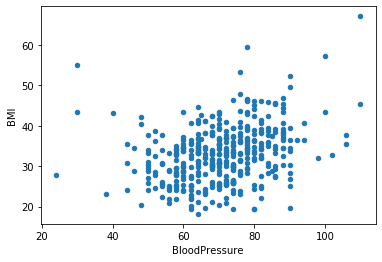

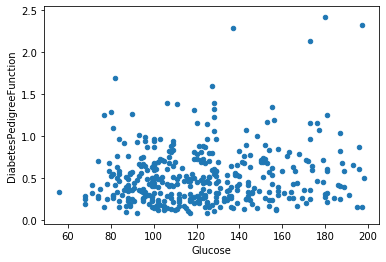

In [221]:
df.plot.scatter(x = 'BloodPressure', y = 'BMI')
plt.show()

# This scatter plot is centered from 40 to 100 mm Hg for Blood Pressure.

# There are four outliers below 40 mm Hg, and five outliers above 100 mm Hg.

# Yes, there is a linear positive trend.

df.plot.scatter(x = 'Glucose', y = 'DiabetesPedigreeFunction')
plt.show()

# This scatter plot is not centered, it is skewed to the left.

# There is an outlier below 60 mm Hg, and above 2.0 Diabetes Pedigree Function.

# No, there is no trend.



## 3.	Create histograms for attributes 2, 3 and 6. Then create the same histograms for the 3 attributes for the instances of class 1 and for the instances of class 0; interpret the obtained 9 histograms. 

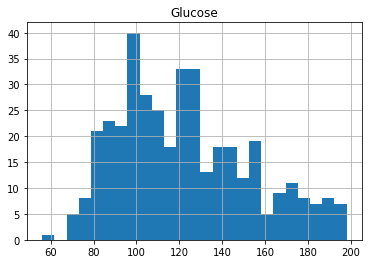

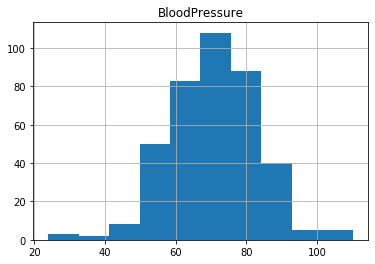

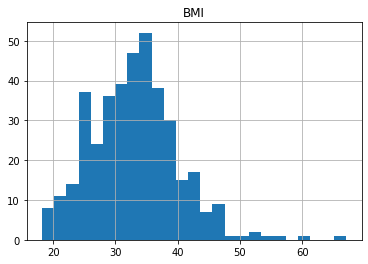

In [222]:
df[['Glucose']].hist(bins=25)

plt.show()

# Our Glucose histogram has a left-skewed, bimodal distribution.
# It's range is from about 60 to 200, with a peak of 40.

df[['BloodPressure']].hist()

plt.show()

# Our BloodPressure histogram has a unimodal, normal distribution with really no skew.
# It's range is from about 25 to 110 mm Hg, with a peak of 55 mm Hg.

df[['BMI']].hist(bins=25)

plt.show()

# Our BMI histogram has a left-skewed, normal distribution.
# It's range is from about 18 to 65, with a peak of 52.

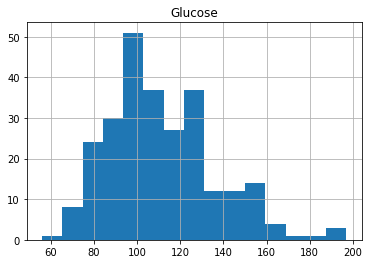

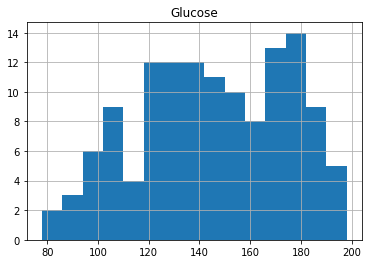

In [223]:
df.groupby('Outcome').hist(column='Glucose', bins=15)

plt.show()

# Our Outcome 0 Glucose histogram has a left-skewed, normal distribution.
# It's range is from about 58 to 198 with a peak of 51.

# Our Outcome 1 Glucose histogram has a slightly right-skewed, almost random distribution.
# It's range is from about 78 to 198 with a peak of 14.

# Outcome 0 is more pronounced and uniformly distributed than Outcome 1.
# Yes we can infer Outcome from this attribute, Outcome 0 have much lower glucose levels due to the left-skew.


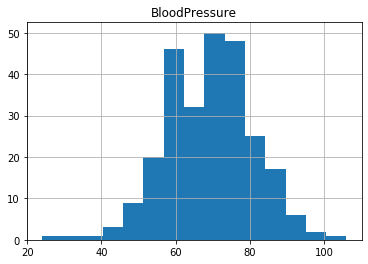

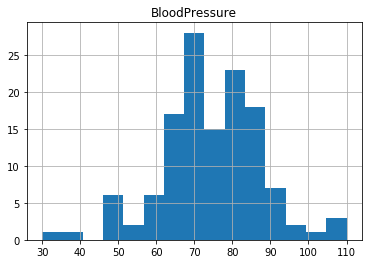

In [224]:
df.groupby('Outcome').hist(column='BloodPressure', bins = 15)

plt.show()

# Our Outcome 0 Blood Pressure histogram has a bimodal, normal distribution.
# It's range is from about 22 to 110 with a peak of 50.

# Our Outcome 1 Blood Pressure histogram has a slightly right-skewed, almost random distribution.
# It's range is from about 30 to 110 with a peak of 30.

# These histograms are fairly similar, I think it would be very difficult to infer outcome solely based from this attribute.

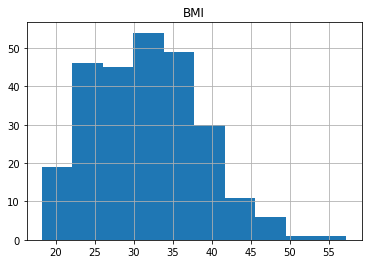

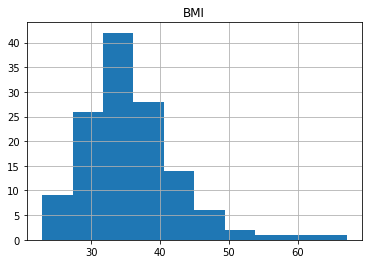

In [225]:
df.groupby('Outcome').hist(column='BMI', bins = 10)

plt.show()

# Our Outcome 0 BMI histogram has a left-skewed, fairly unimodal distribution.
# It's range is from about 15 to 60 with a peak of 55.

# Our Outcome 1 BMI histogram has a more pronounced left-skewed, uniform distribution.
# It's range is from about 25 to 68 with a peak of 43.

# Outcome 1 is more pronounced and uniformly distributed than Outcome 0.
# We can infer attribute from this attribute: those with Outcome 1 on average have a lower BMI.


## 4.	Create box plots for the 2nd , 7th and 8th attribute; one for the whole dataset and one each for the instances of the two classes. Remove 0’s that do not make sense prior to computing the box plots.  Interpret and compare the obtained 9 boxplots!  

          Glucose
count  392.000000
mean   122.627551
std     30.860781
min     56.000000
25%     99.000000
50%    119.000000
75%    143.000000
max    198.000000


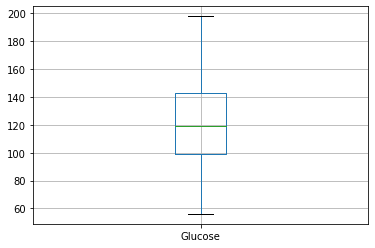

In [226]:
print(df[['Glucose']].describe())

df.boxplot(column='Glucose')
plt.show()


# Our Glucose boxplot is centered at 119 and it has no outliers.
# It's Q1 is at 56, Q2 at 99, Q3 at 143, and Q4 at 199.
# Mean is right-skewed because the median is to the left.


       BloodPressure
count     392.000000
mean       70.663265
std        12.496092
min        24.000000
25%        62.000000
50%        70.000000
75%        78.000000
max       110.000000


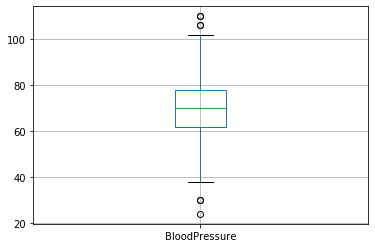

In [227]:
print(df[['BloodPressure']].describe())

df.boxplot(column='BloodPressure')
plt.show()

# Our Blood Pressure boxplot is centered at 70,
# with two outliers above Q4 and two outliers below Q1.

# It's Q1 is at 38, Q2 at 62, Q3 at 78, and Q4 at 102.
# The mean is not skewed because the mean is around 70 as well.

       DiabetesPedigreeFunction
count                392.000000
mean                   0.523046
std                    0.345488
min                    0.085000
25%                    0.269750
50%                    0.449500
75%                    0.687000
max                    2.420000


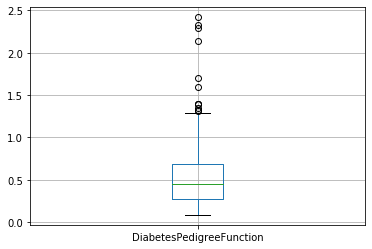

In [228]:
print(df[['DiabetesPedigreeFunction']].describe())

df.boxplot(column='DiabetesPedigreeFunction')
plt.show()

# Our Diabetes Pedigree boxplot is centered at 0.4 and it has 
# about 10 outliers above its Q4 of 1.25.
# It's Q1 is at 0.085, Q2 at 0.269, Q3 at 0.687, and Q4 at 1.3.
# Mean is right-skewed because the median is moved more to left of dataset.

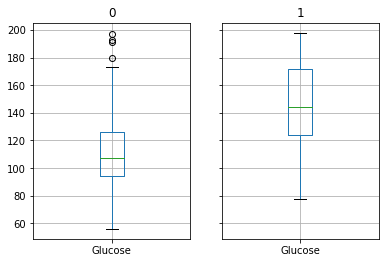

In [229]:
df.groupby('Outcome').boxplot(column='Glucose')
plt.show()

# There are major differences between the Glucose boxplots for Outcome 0
# and Outcome 1.

# The median / center, and quantiles for Outcome 1 are all higher than Outcome 0.
# The mean for Outcome 1 is skewed to the left, while the mean for Outcome 0 is skewed to the right.
# Outcome 1 has no outliers, while Outcome 0 has a few.

# People with diabetes will live shorter because their glucose levels are elevated.

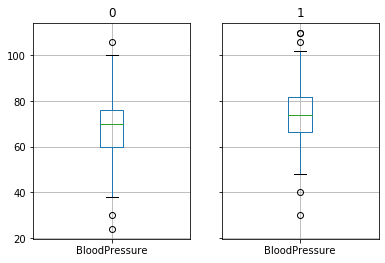

In [230]:
df.groupby('Outcome').boxplot(column='BloodPressure')
plt.show()

# There are major differences between the Blood Pressure boxplots for Outcome 0
# and Outcome 1.

# The median / center, and quantiles for Outcome 1 are all higher than Outcome 0.
# The mean for Outcome 1 is not really skewed, while the mean Outcome 0 is skewed to the left.
# Outcome 1 has four outliers, while Outcome 0 has three.

# People with diabetes (outcome 1) will live shorter because their BP is elevated.

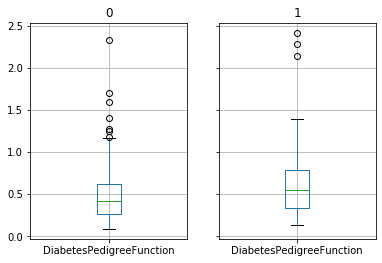

In [231]:
df.groupby('Outcome').boxplot(column='DiabetesPedigreeFunction')
plt.show()

# There are major differences between the Diabetes Pedigree Function boxplots for Outcome 0
# and Outcome 1.

# The median / center, and quantiles for Outcome 1 are all higher than Outcome 0.
# The mean for Outcome 0 is more skewed to the right than the mean for Outcome 1.
# Outcome 1 has three outliers, while Outcome 0 has about 10.

# People with diabetes and their children will have shorter lives due to the hightened mean / median of the
# pedigree function for Outcome 1.

## 5.	Create supervised scatter plots  for all pairs of attributes 2-6—these are 10 plots. Next create two 3D-scatterplots: one for attributes 2, 3, 6 and one for attributes 2, 4, 6. Interpret the obtained scatter plots; in particular address what can be said about the difficulty in predicting diabetes. Assess the usefulness of the 3D scatterplot compared to the 2D plots! 

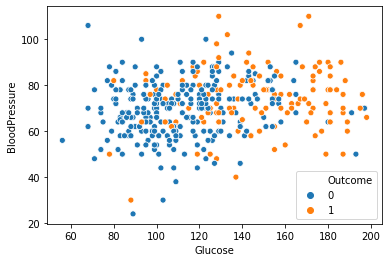

In [232]:
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', data=df, hue='Outcome')
plt.show()

# Scatter plot is not centered, with outliers below 40 and above 100 BP.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

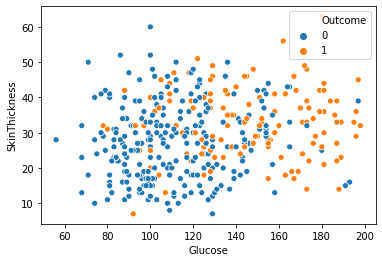

In [233]:
sns.scatterplot(x = 'Glucose', y = 'SkinThickness', data=df, hue='Outcome')
plt.show()

# Scatter plot is not centered, with outliers above 55 Skin Thickness.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

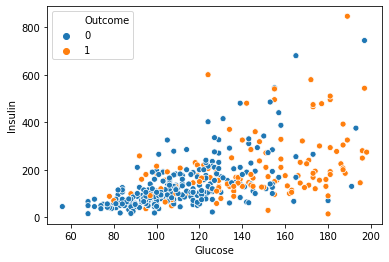

In [234]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data=df, hue='Outcome')
plt.show()

# Data is centered from about 65 to 160 Glucose.
# There are a few outliers above 600 Insulin.
# There is a linear positive trend.

# There are major differences between Outcome 0 and 1: Outcome 1 points on average
# have higher Glucose and Insulin levels.

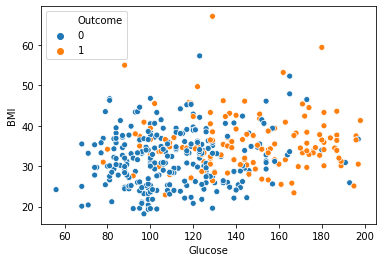

In [235]:
sns.scatterplot(x = 'Glucose', y = 'BMI', data=df, hue='Outcome')
plt.show()

# Scatter plot is not centered, with outliers above 55 BMI.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

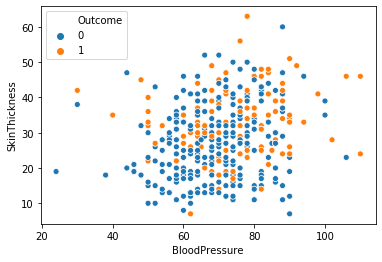

In [236]:
sns.scatterplot(x = 'BloodPressure', y = 'SkinThickness', data=df, hue='Outcome')
plt.show()

# Scatter plot is centered with a range from 40 to 90.
# Outliers above 55 Skin Thickness and 100 Blood Pressure.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

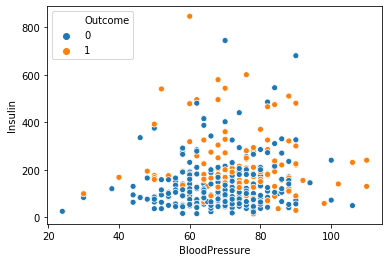

In [237]:
sns.scatterplot(x = 'BloodPressure', y = 'Insulin', data=df, hue='Outcome')
plt.show()

# Scatter plot centered with a range from 40 to 100 BP.
# There are outliers above 400 Skin Thickness and 100 Blood Pressure.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

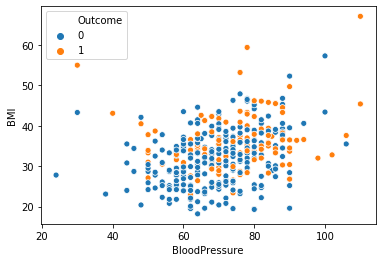

In [238]:
sns.scatterplot(x = 'BloodPressure', y = 'BMI', data=df, hue='Outcome')
plt.show()

# Scatter plot centered with a range from 40 to 100 BP.
# There are outliers above 50 BMI and 100 Blood Pressure.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

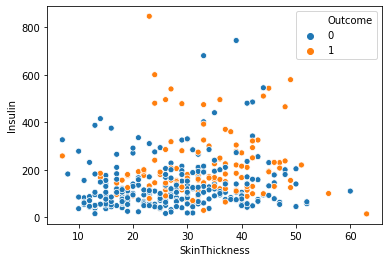

In [239]:
sns.scatterplot(x = 'SkinThickness', y = 'Insulin', data=df, hue='Outcome')
plt.show()

# Scatter plot not centered.
# There are outliers above 600 Insulin and 55 Skin Thickness.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

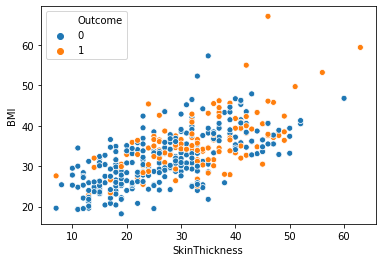

In [240]:
sns.scatterplot(x = 'SkinThickness', y = 'BMI', data=df, hue='Outcome')
plt.show()

# Scatter plot is centered with a range from 10 to 50 Skin Thickness.
# There are outliers above 50 BMI and 55 Skin Thickness.
# There is a linear positive trend.

# There are major differences between Outcome 0 and 1: Outcome 1 points on average
# have higher SkinThickness levels and BMIs.

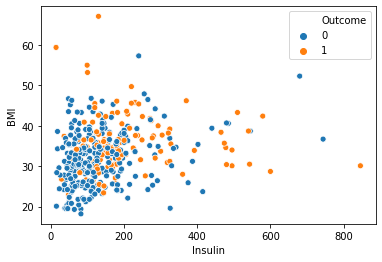

In [241]:
sns.scatterplot(x = 'Insulin', y = 'BMI', data=df, hue='Outcome')
plt.show()

# Scatter plot is centered with a range from 0 to 250 Insulin.
# There are outliers above 50 BMI and 600 Insulin.
# There isn't a trend.

# No major differences between Outcome 0 and 1, making it almost impossible to predict
# class label based off of this scatter plot.

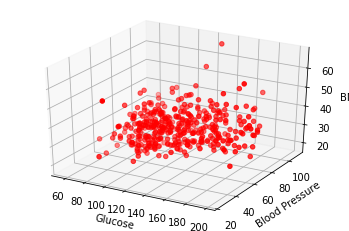

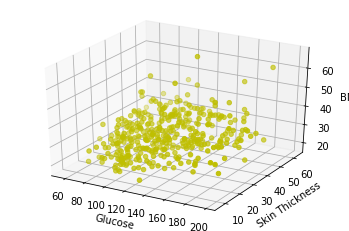

In [242]:
threeD1 = plt.figure().gca(projection='3d')
threeD1.scatter(df['Glucose'], df['BloodPressure'], df['BMI'], c='r')
threeD1.set_xlabel('Glucose')
threeD1.set_ylabel('Blood Pressure')
threeD1.set_zlabel('BMI')
plt.show()

threeD2 = plt.figure().gca(projection='3d')
threeD2.scatter(df['Glucose'], df['SkinThickness'], df['BMI'], c='y')
threeD2.set_xlabel('Glucose')
threeD2.set_ylabel('Skin Thickness')
threeD2.set_zlabel('BMI')
plt.show()

# 2D plots are much easier to interpret and observe trends than 3D plots.
# It's difficult to extract a story from the 3D plots.

# However, the 3D plots are much more visually impressive and eye-catching:
# they would be a great addition to a visual presentation if there were
# aspects added making them easier to interpret.

# Outcome 0 and Outcome 1 aren't even distinguishable in this model.



## 5.	Create supervised scatter plots  for all pairs of attributes 2-6—these are 10 plots. Next create two 3D-scatterplots: one for attributes 2, 3, 6 and one for attributes 2, 4, 6. Interpret the obtained scatter plots; in particular address what can be said about the difficulty in predicting diabetes. Assess the usefulness of the 3D scatterplot compared to the 2D plots! 

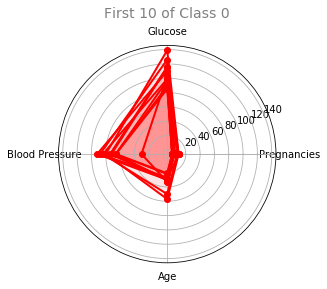

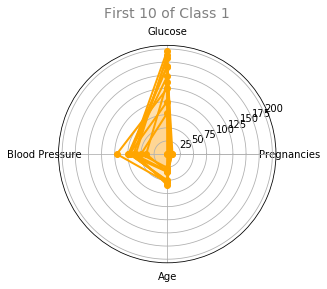

In [243]:
# Class 0 Radar Plot

df0 = pd.read_csv("diabetes_cleaned.csv", header=None, usecols=[0,1,2,7,8])
df0 = df0[df0[8] < 1]
df0 = df0[:10]
df0 = df0[df0.columns[0:4]]
df0.index = range(10)

#print(df)

labels=np.array(['Pregnancies', 'Glucose', 'Blood Pressure', 'Age'])

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)

for i in range(10):
       

    stats=df0.loc[i]

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax.plot(angles, stats, 'o-', color='red', linewidth=2)
    ax.fill(angles, stats, color='red', alpha=0.05)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)
    plt.title('First 10 of Class 0', color='gray', size=14, y=1.1)
    
# Class 1 Radar Plot
    
df1 = pd.read_csv("diabetes_cleaned.csv", header=None, usecols=[0,1,2,7,8])
df1 = df1[df1[8] > 0]
df1 = df1[:10]
df1 = df1[df1.columns[0:4]]
df1.index = range(10)

#print(df)

labels=np.array(['Pregnancies', 'Glucose', 'Blood Pressure', 'Age'])

fig=plt.figure()    
ax = fig.add_subplot(111, polar=True)

for j in range(10):
    
    stats=df1.loc[j]

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax.plot(angles, stats,'o-', color='orange', linewidth=2)
    ax.fill(angles, stats, color='orange', alpha=0.05)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)
    plt.title('First 10 of Class 1', color='grey', size=14, y=1.1)
    
# The first 10 instances of Class 0 on average have higher blood pressure,
# age, and pregnancies than the first 10 instances of Class 1.

## 7.	Fit a linear model that predicts the class attribute using the 8 z-scored, continuous attributes of the cleaned dataset as independent variables . Report the R2 of the linear model and the coefficients of each attribute in the obtained regression function.  Next, drop the two attributes, whose coefficients are the closest to 0, and obtain a linear model using the six remaining attributes as independent variable.  Do the coefficients tell you anything about the importance of the attribute in predicting diabetes? What about negative and positive coefficients? Also compare the two regression functions! 

In [244]:
from sklearn import linear_model
import statsmodels.formula.api as sm
import pandas as pd

df = pd.read_csv("diabetes_cleaned.csv", header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
columns = list(df.columns)
columns.remove('Outcome')

for i in columns:
    zscore = i + '_ZScore'
    
    #calculating z score for each attribute
    
    df[zscore] = (df[i] - df[i].mean()) / df[i].std(ddof=0)
    
model = sm.ols(formula="Outcome ~ Pregnancies_ZScore + Glucose_ZScore + BloodPressure_ZScore + SkinThickness_ZScore + Insulin_ZScore + BMI_ZScore + DiabetesPedigreeFunction_ZScore + Age_ZScore", data = df).fit()

print(model.params)
print(model.summary())

# The Z scores are all listed below.

# The R^2 of our linear function is 0.321 and the coefficients are listed
# under the table column that reads "coef".

# Glucose and BMI have the highest regression coefficients with .1966 and .0990 respectively,
# meaning they are the best attributes available in our set for predicting whether an individual has diabetes or not.

# BP and Insulin have the most negative regression coefficients with -0.014 and -0.0076 respectively,
# meaning they have an inverse relationship with the presence of diabetes, suggesting they could be great indicators
# for somebody not having diabetes.

# Insulin and Skin Thickness have the regression coefficients closest to 0, so we'll drop these for our next plot.

Intercept                          0.348958
Pregnancies_ZScore                 0.069717
Glucose_ZScore                     0.196633
BloodPressure_ZScore              -0.014003
SkinThickness_ZScore               0.001426
Insulin_ZScore                    -0.007557
BMI_ZScore                         0.099028
DiabetesPedigreeFunction_ZScore    0.042785
Age_ZScore                         0.024679
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     44.85
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.86e-59
Time:                        19:43:15   Log-Likelihood:                -372.00
No. Observations:                 768   AIC:                             762.0
Df Residuals:                     75

In [245]:
from sklearn import linear_model
import statsmodels.formula.api as sm
import pandas as pd

df = pd.read_csv("diabetes_cleaned.csv", header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
columns = list(df.columns)
columns.remove('Insulin')
columns.remove("SkinThickness")
columns.remove('Outcome')

for i in columns:
    zscore = i + '_ZScore'
    
    #calculating z score for each attribute
    
    df[zscore] = (df[i] - df[i].mean()) / df[i].std(ddof=0)
    
model = sm.ols(formula="Outcome ~ Pregnancies_ZScore + Glucose_ZScore + BloodPressure_ZScore + BMI_ZScore + DiabetesPedigreeFunction_ZScore + Age_ZScore", data = df).fit()

print(model.params)
print(model.summary())

# The Z scores are all listed below.

# The R^2 of our linear function is 0.321 and the coefficients are listed
# under the table column that reads "coef".

# Glucose and BMI have the highest positive regression coefficients with .1937 and .0991 respectively,
# meaning they are the best attributes available in our set for predicting whether an individual has diabetes or not.

# BP has a negative coefficient of -0.0136,
# meaning it has an inverse relationship with the presence of diabetes, suggesting it could be a great indicator for
# somebody not having diabetes.

# The regression coefficients for the 2nd linear model (Insulin & Skin Thickness removed) are slightly higher than those of
# the first, suggesting that the attributes used from the 2nd model are a better predictor / indicator of somebody having
# diabetes or not.



Intercept                          0.348958
Pregnancies_ZScore                 0.069834
Glucose_ZScore                     0.193703
BloodPressure_ZScore              -0.013613
BMI_ZScore                         0.099148
DiabetesPedigreeFunction_ZScore    0.042585
Age_ZScore                         0.024415
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     59.90
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           9.05e-61
Time:                        19:43:15   Log-Likelihood:                -372.12
No. Observations:                 768   AIC:                             758.2
Df Residuals:                     761   BIC:                             790.7
Df Model:                           6        

## Decision Trees

Test Accuracy: 72.2943722943723%
Training Accuracy: 74.30167597765363%


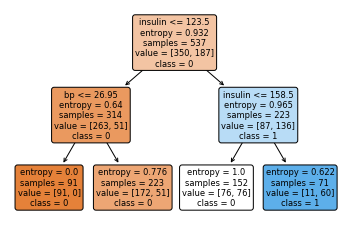

In [246]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

%matplotlib inline

df = pd.read_csv("diabetes_cleaned.csv", header=None)

x = df.values[:, 0:7]
y = df.values[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 5)

entropyTree = entropy.fit(x_train, y_train)

testPred = entropyTree.predict(x_test)

trainPred = entropyTree.predict(x_train)

testAccuracy = accuracy_score(y_test, testPred)*100

trainAccuracy = accuracy_score(y_train, trainPred)*100

print("Test Accuracy: " +str(testAccuracy)+"%")
print("Training Accuracy: " +str(trainAccuracy)+"%")

tree.plot_tree(entropyTree, filled=True, rounded=True, feature_names = feature_cols,class_names=['0','1'])

plt.show()

#Root:
# The following decision tree was constructed to map out the predictive factor of somebody having Outcome 1 due 
# to their Insulin or BP.

# Level 1:
# First insulin was chosen to be the root based on its high Information Gain (entropy = .932) in terms of Outcome. Then,
# we chose to split on BP, because it has the highest IG after Insulin (entropy = 0.64). Splitting on BP produces
# two outcomes of 0, because BP is not a great indicator of whether or not someboday has diabetes.

# Level 2:
# We then split on Insulin which has a high entropy of 0.965, which results in an overwhelming Outcome
# of 1, or positive for diabetes (entropy = 0.622). We have a pure leaf for Outcome 0 for Insulin, because those 
# with significantly high insulin tend to have diabetes, making it an excellent predictor.



Test Accuracy: 72.2943722943723%
Training Accuracy: 74.30167597765363%


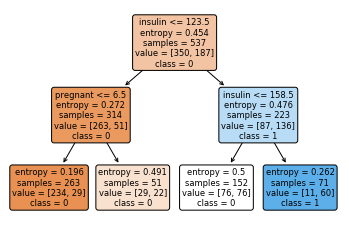

In [247]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

df = pd.read_csv("diabetes_cleaned.csv", header=None)

x = df.values[:, 0:4]
y = df.values[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

entropy = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 2, min_samples_leaf = 5)

entropyTree = entropy.fit(x_train, y_train)

testPred = entropyTree.predict(x_test)

trainPred = entropyTree.predict(x_train)

testAccuracy = accuracy_score(y_test, testPred)*100

trainAccuracy = accuracy_score(y_train, trainPred)*100

print("Test Accuracy: " +str(testAccuracy)+"%")
print("Training Accuracy: " +str(trainAccuracy)+"%")

tree.plot_tree(entropyTree, filled=True, rounded=True, feature_names = feature_cols,class_names=['0','1'])
plt.show()

# Root
# The following decision tree was constructed to map out the predictive factor of somebody having Outcome 1 due 
# to their Insulin or # of Pregnancies.

# Level 1:
# First Insulin was chosen to be the root based on its high Information Gain (entropy = .00454) in terms of Outcome. Then,
# we chose to split on Pregnancies, because it has the highest IG after Insulin (entropy = 0.272). Splitting on BP produces
# two outcomes of 0, because Pregnancies is not a great indicator of whether or not someboday has diabetes.

# Level 2:
# We then split on Insulin which has an entropy of 0.476, which results in an overwhelming Outcome
# of 1 , or positive for diabetes (entropy = 0.262). We have a pure leaf for Outcome 0 for Insulin (entropy = 0.5), because those 
# with significantly high insulin tend to have diabetes, making it an excellent predictor.

Test Accuracy: 72.2943722943723%
Training Accuracy: 74.30167597765363%


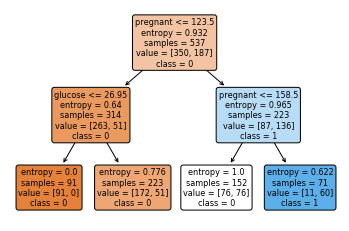

In [248]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

df = pd.read_csv("diabetes_cleaned.csv", header=None)

x = df.values[:, 1:7]
y = df.values[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 5)

entropyTree = entropy.fit(x_train, y_train)

testPred = entropyTree.predict(x_test)

trainPred = entropyTree.predict(x_train)

testAccuracy = accuracy_score(y_test, testPred)*100

trainAccuracy = accuracy_score(y_train, trainPred)*100

print("Test Accuracy: " +str(testAccuracy)+"%")
print("Training Accuracy: " +str(trainAccuracy)+"%")

tree.plot_tree(entropyTree, filled=True, rounded=True, feature_names = feature_cols,class_names=['0','1'])
plt.show()

# The following decision tree was constructed to map out the predictive factor of somebody having Outcome 1 due 
# to their # of Pregnancies or Glucose level.

# Root 
# First Pregnancies was chosen to be the root based on its high Information Gain (entropy = 0.932) in terms of Outcome. 

# Level 1:
# Then, we chose to split on Glucose, because it has the highest IG after Pregnancies (entropy = 0.64). Splitting on Glucose produces
# two outcomes of 0, because Glucose is not a great indicator of whether or not somebody has diabetes.

# Level 2:
# We then split on Pregnancies which has an entropy of 0.965, which results in an overwhelming Outcome
# of 1 , or positive for diabetes (entropy = 0.622). We have a pure leaf for Outcome 0 for Insulin (entropy = 1.0).

# Decision Trees: decision trees 1 & 2 both share insulin, indicating that it's an important factor for predicting diabetes.
# Also, trees 2 & 3 share pregnancies as an attribute, indicating that it's an important factor for predicting diabetes.

In [249]:
#Summary:

# Comparing our decision tree and linear models, we found that they share similar results: glucose is an important 
# attribute for predicting diabetes due to its high regression coefficient (0.1937), and also it's place on the 2nd 
# level in our 3rd decision tree. Pregnancies was also found to be have important regression coefficient (0.0698), 
# and it has a place near the top on decision trees 2 & 3.

# According to our multiple linear regression, Insulin and Skin Thickness are the least significant attributes
# when it comes to predicting diabetes, hence why they were dropped for the second plot.
# Glucose and BMI are the most significant attributes when it comes to predicting diabetes due to their high regression 
# coefficients.

# According to our supervised scatter plots, there is a significant positive relationship between glucose, insulin, and outcome:
# those with diabetes tend to have higher insulin and glucose levels, confirming that glucose is a great predictive attribute.
# Also, we noticed a significant positive relationship between BMI and Skin Thickness, but our linear model showed
# Skin Thickness to be insignificant when predicting whether or not somebody has diabetes.

# Our boxplots revealed that those with diabetes will tend to live shorter lives due to their elevated blood pressure and glucose
# levels.

# Our histograms revealed that glucose levels tend to be lower in patients without diabetes.

# Thus, we conclude that Glucose & BMI are the most significant attributes for predicting whether or not somebody has diabetes:
# they both have fairly high regression coefficients, and glucose has a significant place on our last decision tree. Glucose's
# predictive importance was confirmed by its scatter plot with outcome. Insulin and skin thickness should not be heavily 
# considered when predicting if somebody has diabetes.


